<a href="https://colab.research.google.com/github/BingHungLee/BHAI-Daily-Practice/blob/main/%5B20210713%5D_Titanic_Kaggle_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Day16-Scikit-learn介紹(8)_ Decision Trees - https://ithelp.ithome.com.tw/articles/10206241
* sklearn.tree.export_graphviz - https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
* sklearn.tree.DecisionTreeClassifier - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* 1.10. Decision Trees - https://scikit-learn.org/stable/modules/tree.html
* CART(Classification And Regression Tree)算法原理详解 - https://blog.csdn.net/u012897374/article/details/74999724

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score

from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

In [2]:
!git clone https://github.com/BingHungLee/Dataset.git

fatal: destination path 'Dataset' already exists and is not an empty directory.


In [3]:
cd /content/Dataset

/content/Dataset


In [4]:
Dta_train = pd.read_csv("titanic_train.csv")

## Pre-Processing

In [5]:
X = Dta_train[['Pclass','Sex','Age','Fare','Embarked']]
y = Dta_train['Survived'].values

In [6]:
X

,Pclass,Sex,Age,Fare,Embarked
0,3,male,22.0,7.2500,S
1,1,female,38.0,71.2833,C
2,3,female,26.0,7.9250,S
3,1,female,35.0,53.1000,S
4,3,male,35.0,8.0500,S
...,...,...,...,...,...
886,2,male,27.0,13.0000,S
887,1,female,19.0,30.0000,S
888,3,female,NaN,23.4500,S
889,1,male,26.0,30.0000,C


In [7]:
#Preserve Non-NAN Value
non_nan_row = np.where(X.isnull().sum(axis=1)==0)[0]
X=X.iloc[non_nan_row,:]
X=X.reset_index(drop=True)
y = y[non_nan_row]

In [8]:
#Dummy Variables Handle
X = pd.concat([X, pd.get_dummies(X['Pclass']),pd.get_dummies(X['Sex']),pd.get_dummies(X['Embarked'])], axis =1)
X = X.drop(columns=['Pclass','Sex','Embarked'])

## Model Train I

In [9]:
#DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)
tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
#Model Validification
fitted_classes = tree.predict(X)
accuracy=accuracy_score(y.flatten(),fitted_classes)
print(accuracy)

0.9845505617977528


In [11]:
#Check Confusion Matrix
print(confusion_matrix(fitted_classes,y.flatten(),labels=[0,1]))  

[[424  11]
 [  0 277]]


## Model Train II

In [12]:
nTimes = 10
accuracy = np.zeros(nTimes)
for t in range(nTimes):
  Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=0)

  model = DecisionTreeClassifier().fit(X, y)

  #Model Validification
  fitted_classes = tree.predict(Xtest)
  accuracy[t]=accuracy_score(ytest,fitted_classes)

  print('%d: %f' %(t,accuracy[t]))
  
print(np.mean(accuracy))

0: 0.976636
1: 0.976636
2: 0.976636
3: 0.976636
4: 0.976636
5: 0.976636
6: 0.976636
7: 0.976636
8: 0.976636
9: 0.976636
0.9766355140186918


## Model Predict

In [13]:
Dta_test = pd.read_csv("titanic_test.csv")

In [14]:
X = Dta_test[['Pclass','Sex','Age','Fare','Embarked']]

#Preserve Non-NAN Value
non_nan_row = np.where(X.isnull().sum(axis=1)==0)[0]
X=X.iloc[non_nan_row,:]
X=X.reset_index(drop=True)
y = y[non_nan_row]

#Dummy Variables Handle
X = pd.concat([X, pd.get_dummies(X['Pclass']),pd.get_dummies(X['Sex']),pd.get_dummies(X['Embarked'])], axis =1)
X = X.drop(columns=['Pclass','Sex','Embarked'])

#DecisionTreeClassifier
#tree = DecisionTreeClassifier(max_depth=3).fit(X, y)

#Model Validification
pred_classes = tree.predict(X)
#accuracy=accuracy_score(y.flatten(),fitted_classes)
#print(accuracy)
pred_classes

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,

## Graphviz
https://graphviz.org/download/

In [15]:
!sudo apt install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [16]:
from sklearn import tree
from IPython.display import Image
import pydotplus

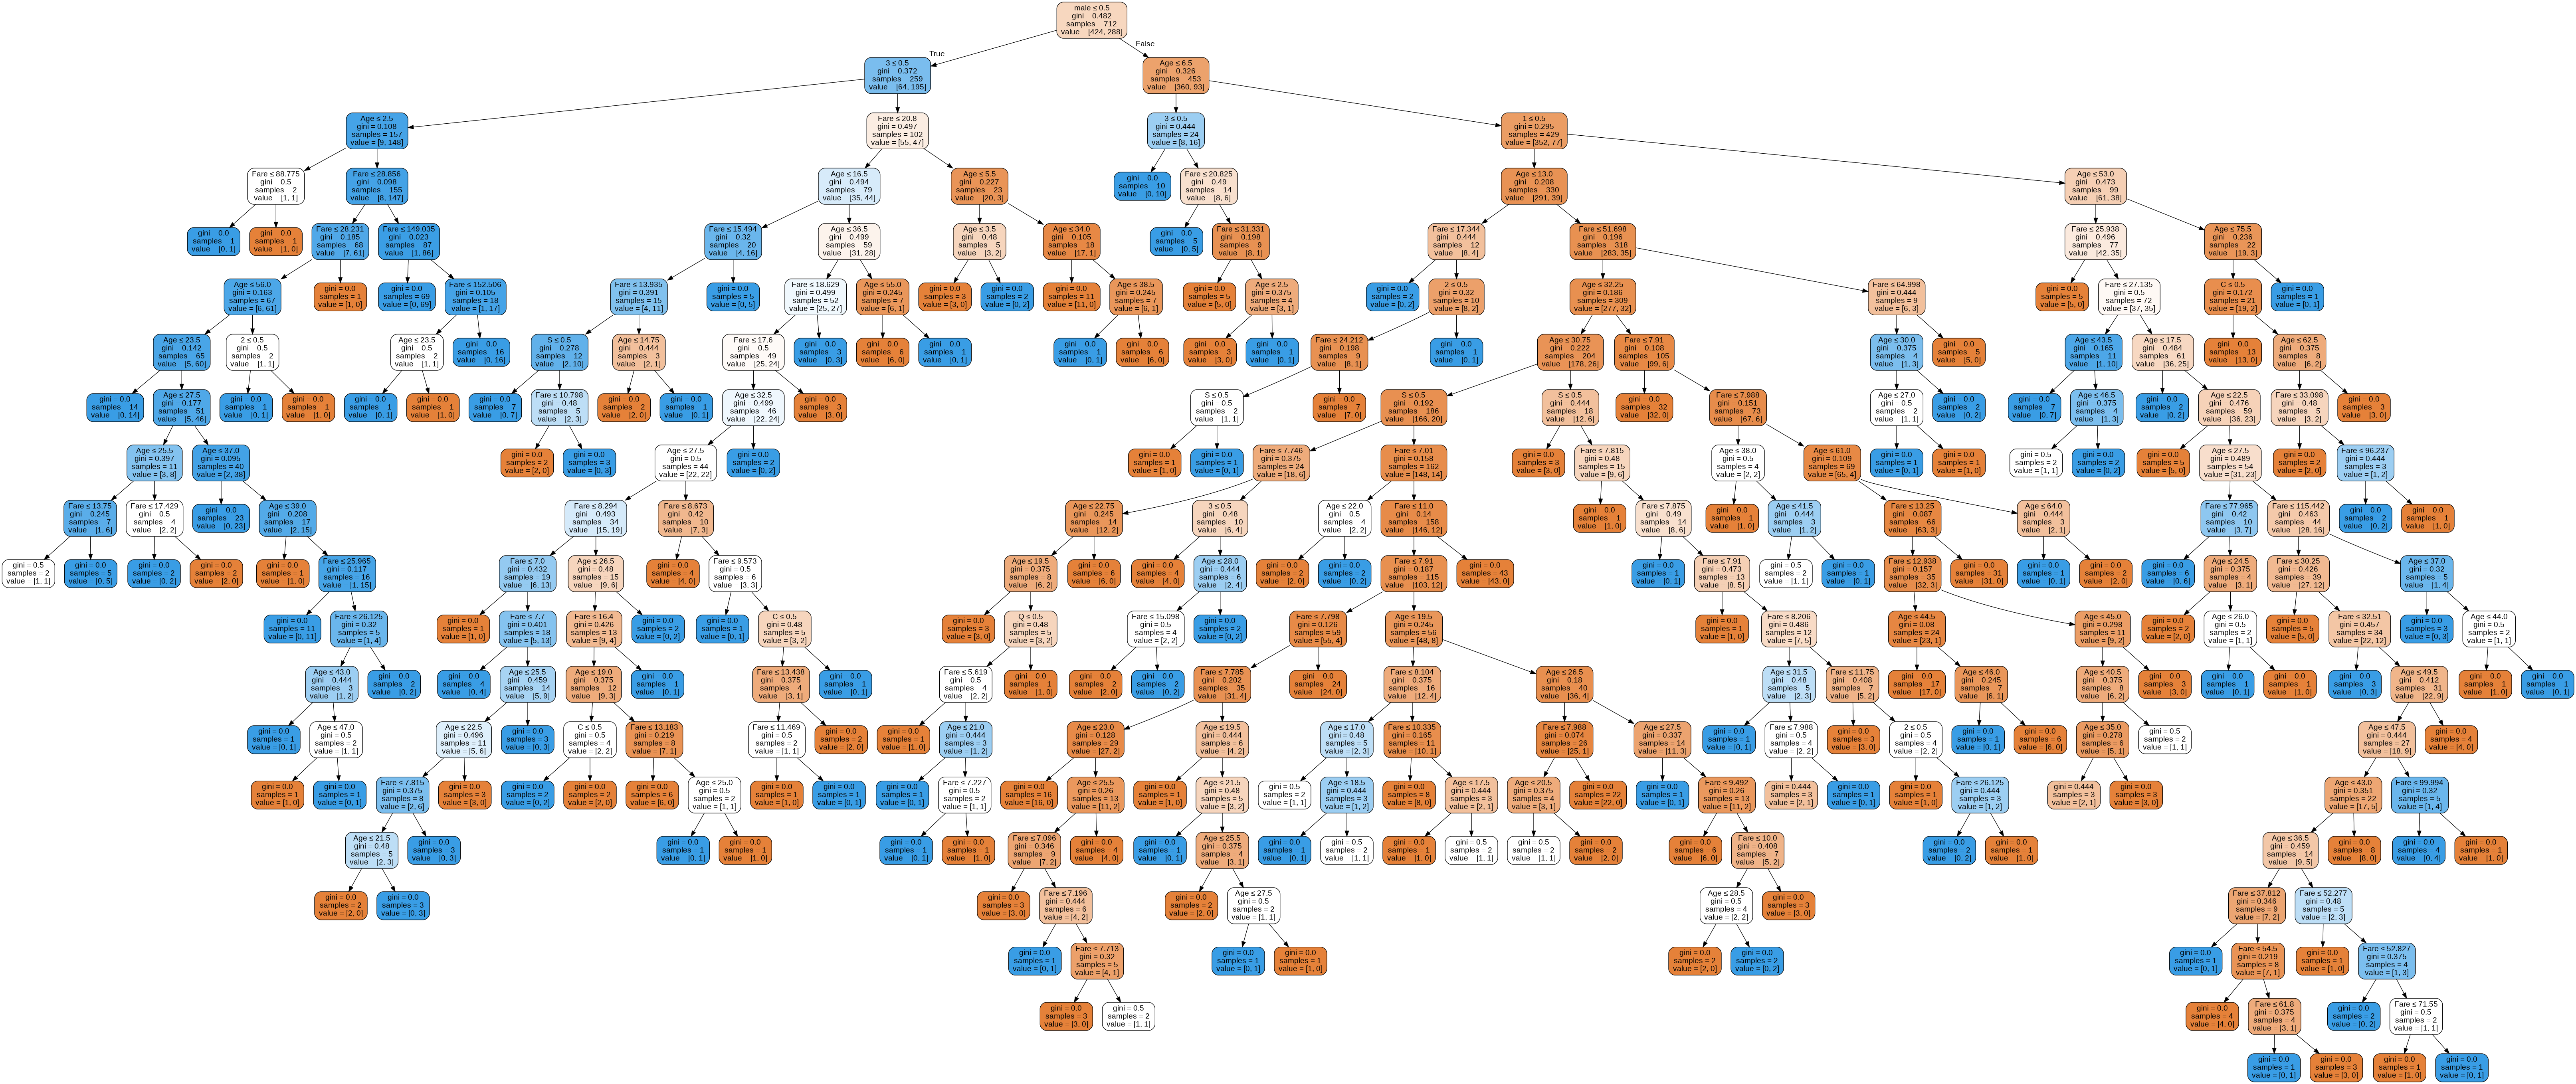

In [17]:
dot_data=tree.export_graphviz(model, out_file=None, feature_names=X.columns, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
#graph.write_png("")

## Important Factor Abstarct

(0.0, 105.0)

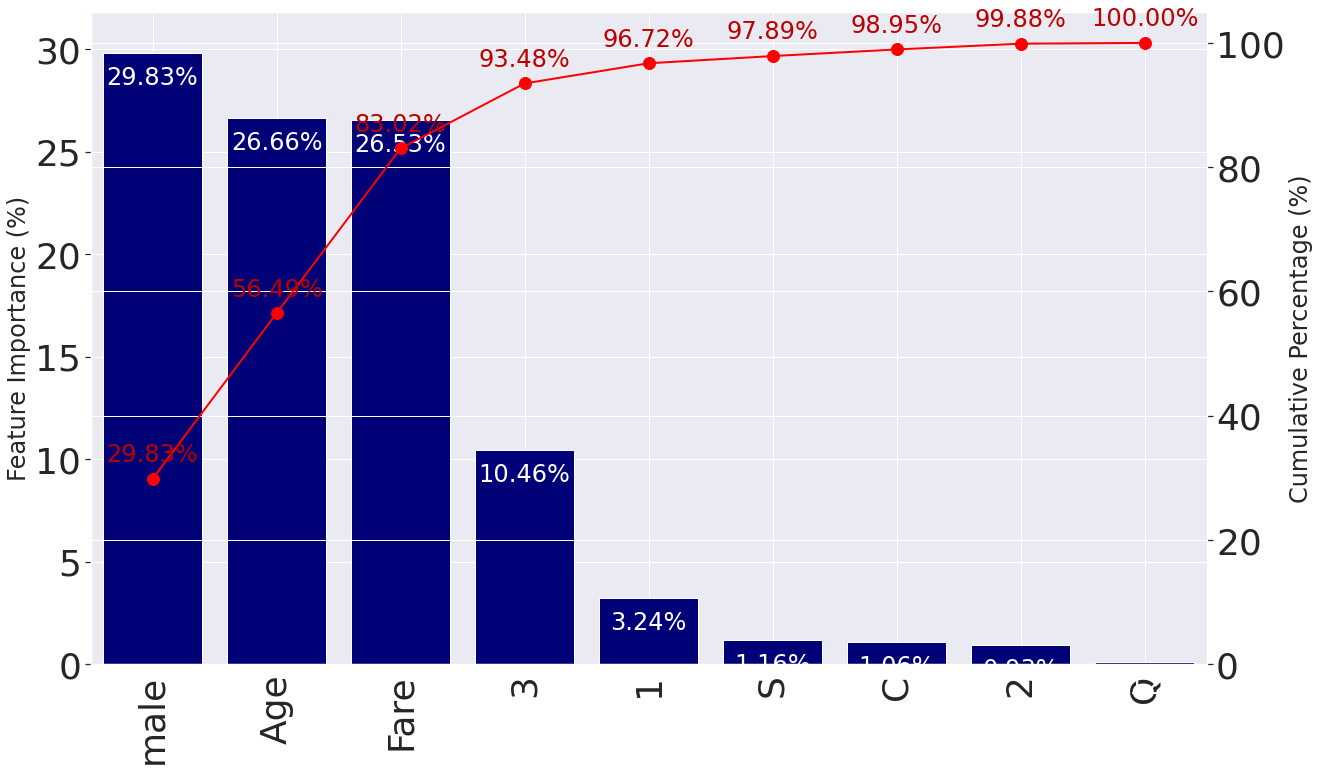

In [18]:
#Important Factor Abstarct
featNames = np.array(X.columns)
featImp = model.feature_importances_*100
featSort = np.argsort(featImp)

featImps = np.flip(featImp[featSort],axis=0)
featNames = np.flip(featNames[featSort],axis=0)
featCumsum = np.cumsum(featImps)
featNonzero = (featImps >0)

featImpSNZ = featImps[featNonzero]
featNamesSNZ = featNames[featNonzero]
featCumsumNZ = featCumsum[featNonzero]

# Draw Importance Figure
bw = .8
fig = plt.figure(figsize=(20, 12))
ax = plt.subplot(1, 1, 1)
ax.bar(np.arange(featImpSNZ.shape[0]), featImpSNZ, align='center', width = bw, color = '#000077')
for i in range(featImpSNZ.shape[0]):
  ax.text(i, featImpSNZ[i] - np.max(featImpSNZ)*0.02, '{:3.2f}'.format(featImpSNZ[i]) + '%', fontsize = 24, color = '#FFFFFF',
          verticalalignment = 'top', horizontalalignment = 'center')
ax.set_title('', fontsize = 20)
ax.set_ylabel('Feature Importance (%)', fontsize = 24)
ax.set_ylim([0, np.max(featImpSNZ) + 2])
ax.set_xlim([-.5, featImpSNZ.shape[0]-.5 ])
ax.set_xticks(np.arange(featImpSNZ.shape[0]))
ax.set_xticklabels(tuple(featNamesSNZ), rotation = 90)
ax.tick_params(labelsize = 36)

ax2 = ax.twinx()
ax2.plot(np.arange(featImpSNZ.shape[0]), featCumsumNZ, '.-', 
         color = '#FF0000', markersize = 24, linewidth = 2)
for i in range(featImpSNZ.shape[0]):
  ax2.text(i, featCumsumNZ[i] + 2, '{:3.2f}'.format(featCumsumNZ[i]) + '%', fontsize = 24, color = '#BB0000',
           verticalalignment = 'bottom', horizontalalignment = 'center')
ax2.tick_params(labelsize = 36)
ax2.set_ylabel('Cumulative Percentage (%)', fontsize = 24)
ax2.set_ylim([0, 105])
#plt.savefig("")